In [31]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Load the pre-trained model and tokenizer
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

AttributeError: 'LatentAttentionConfig' object has no attribute '_attn_implementation_internal'

In [28]:
# Example list of strings (sentences) with categories
data = {
    "sentences": [
        "Artificial intelligence is transforming the world.",
        "Artificial intelligence is not transforming the world.",
        "Artificial intelligence is so human-like.",
        "Machine learning is a subset of AI.",
        "Natural language processing is a field of AI.",
        "AI models can now generate human-like text.",
        "The applications of AI are growing rapidly."
    ],
    "categories": ["Artificial intelligence", "Artificial intelligence", "Artificial intelligence", "Machine learning", "Natural language", "AI models", "The applications of AI"]
}

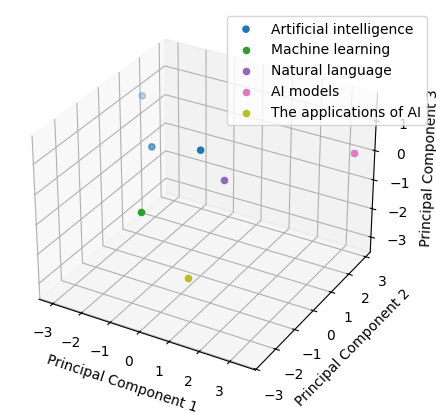

In [29]:
# Create a dataframe to hold sentences and their categories
df = pd.DataFrame(data)

# Function to generate embeddings
def generate_embeddings(sentences):
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    # Take the mean pooling of the token embeddings
    sentence_embeddings = model_output.last_hidden_state.mean(dim=1)
    return sentence_embeddings

# Generate embeddings for the sentences
embeddings = generate_embeddings(df['sentences'].tolist())

# Reduce dimensionality using PCA to visualize in 3D
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embeddings.numpy())

# Add the reduced embeddings to the dataframe
df['pca_x'] = reduced_embeddings[:, 0]
df['pca_y'] = reduced_embeddings[:, 1]
df['pca_z'] = reduced_embeddings[:, 2]

# Matplotlib 3D plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

# Extract unique categories
categories = df['categories'].unique()

# Plot each sample category individually such that we can set the label name
for i, cat in enumerate(categories):
    sub_matrix = df[df["categories"] == cat][['pca_x', 'pca_y', 'pca_z']].to_numpy()
    x = sub_matrix[:, 0]
    y = sub_matrix[:, 1]
    z = sub_matrix[:, 2]
    colors = [cmap(i / len(categories))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

# Set axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add legend
ax.legend(bbox_to_anchor=(1.1, 1))

# Show plot
plt.show()

# Lets use nvidias top performing model

In [5]:
import torch
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Define queries (updated variant queries)
queries = [
    "The variant 6-161350027-G-T in the PRKN gene is predicted to be benign based on in silico predictors, with low scores from CADD (0.447), SpliceAI (0.00), Pangolin (0.00), and a slightly negative phyloP score (-0.318), and it has an extremely rare allele frequency of 0.000001179.",
    "The variant 6-161350163-C-T in the PRKN gene is predicted to be likely pathogenic based on in silico predictors, with a high CADD score (44.0), a low SpliceAI score (0.0100), slightly negative Pangolin score (-0.0500), and a highly conserved phyloP score (8.82), while having a rare allele frequency of 0.000002737.",
    "The variant 6-161350214-G-C in the PRKN gene is predicted to have a potentially deleterious impact based on in silico predictors, with a high CADD score (23.0), elevated SpliceAI score (0.860), negative Pangolin score (-0.730), and a strongly conserved phyloP score (6.95), while being rare with an allele frequency of 0.000002060.",
    "The variant 6-161360122-G-A in the PRKN gene is predicted to be likely benign based on in silico predictors, with a low CADD score (5.27), SpliceAI (0.00), Pangolin (0.00), and a negative phyloP score (-1.03), and it has a rare allele frequency of 0.000008893.",
    "The variant 1-155235002-C-T in the GBA1 gene is predicted to have a moderate potential for pathogenicity based on in silico predictors, with a relatively high CADD score (21.5), moderate REVEL score (0.566), low SpliceAI (0.00), slightly negative Pangolin score (-0.0900), moderately conserved phyloP score (4.28), and a low PolyPhen score (0.0220), indicating low impact. It has a rare allele frequency of 0.0001176.",
    "The variant 1-155235091-C-T in the GBA1 gene is predicted to be likely benign based on in silico predictors, with a moderate CADD score (9.54), low SpliceAI score (0.0800), slightly negative Pangolin score (-0.0400), and a moderately conserved phyloP score (4.23). It has a rare allele frequency of 0.0001451.",
    "The variant 1-155235196-G-A in the GBA1 gene is predicted to be likely pathogenic based on in silico predictors, with a high CADD score (31.0), elevated REVEL score (0.817), low SpliceAI (0.00), slightly negative Pangolin score (-0.0400), highly conserved phyloP score (7.02), and a high PolyPhen score (0.925), indicating probable damage. It has a rare allele frequency of 0.0002457.",
    "The variant 1-155235203-C-G in the GBA1 gene is predicted to be likely benign based on in silico predictors, with a low CADD score (5.77), SpliceAI (0.00), Pangolin (0.00), and a moderately conserved phyloP score (3.50). It has a relatively rare allele frequency of 0.0007621."
]

In [3]:
import transformers
print(transformers.__version__)

4.43.4


In [7]:
# Load model with tokenizer
model = SentenceTransformer('nvidia/NV-Embed-v2', trust_remote_code=True)
model.max_seq_length = 32768
model.tokenizer.padding_side = "right"

# Add EOS tokens to inputs
def add_eos(input_examples):
    return [input_example + model.tokenizer.eos_token for input_example in input_examples]

# Generate embeddings for queries
batch_size = 2
query_embeddings = model.encode(add_eos(queries), batch_size=batch_size, normalize_embeddings=True)

# Reduce dimensionality using PCA to visualize in 3D
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(query_embeddings)

# Define different markers for different genes
gene_marker_map = {
    "PRKN": "o",  # Circle for PRKN
    "GBA1": "s"   # Square for GBA1
}

# Define color mapping for benign vs pathogenic
color_map = {
    "ben": "blue",    # Blue for benign
    "pathog": "red"   # Red for pathogenic
}

# Labels for each query variant
labels = [
    "PRKN ben1", "PRKN pathog1", "PRKN pathog2", "PRKN ben2",
    "GBA1 pathog1", "GBA1 ben1", "GBA1 pathog2", "GBA1 ben2"
]

# Extract gene name and pathogenicity from labels
def get_gene_and_type(label):
    parts = label.split()
    gene = parts[0]  # Extract gene name
    typ = "ben" if "ben" in parts[1] else "pathog"  # Determine if benign or pathogenic
    return gene, typ

# Matplotlib 3D plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')

# Plot each sample with appropriate shape and color
for i, label in enumerate(labels):
    x = reduced_embeddings[i, 0]
    y = reduced_embeddings[i, 1]
    z = reduced_embeddings[i, 2]
    
    gene, typ = get_gene_and_type(label)  # Get gene name and type
    marker = gene_marker_map[gene]        # Get corresponding marker for gene
    color = color_map[typ]                # Get corresponding color for type
    
    ax.scatter(x, y, z, c=color, marker=marker, label=label)

# Set axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add legend (handle duplicate labels)
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), bbox_to_anchor=(1.1, 0.5))

# Show plot
plt.show()

# Print similarity scores between queries
scores = (query_embeddings @ query_embeddings.T) * 100
print("Similarity Scores:")
print(scores.tolist())

Loading checkpoint shards:  25%|██▌       | 1/4 [00:02<00:07,  2.62s/it]

In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '../data/variant_interpretations.csv'
df = pd.read_csv(file_path)

# Extract the second column (sentence) as queries
queries = df['sentence'].tolist()

# Load model with tokenizer
model = SentenceTransformer('nvidia/NV-Embed-v2', trust_remote_code=True)
model.max_seq_length = 32768
model.tokenizer.padding_side = "right"

# Add EOS tokens to inputs
def add_eos(input_examples):
    return [input_example + model.tokenizer.eos_token for input_example in input_examples]

# Generate embeddings for queries (from the CSV file)
batch_size = 2
query_embeddings = model.encode(add_eos(queries), batch_size=batch_size, normalize_embeddings=True)

# Reduce dimensionality using PCA to visualize in 3D
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(query_embeddings)

# Matplotlib 3D plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')

# Plot each sample with a simple scatter
ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2])

# Set axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show plot
plt.show()

# Print similarity scores between queries
scores = (query_embeddings @ query_embeddings.T) * 100
print("Similarity Scores:")
print(scores.tolist())


/home/matthewn/.conda/envs/embed/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
Loading checkpoint shards: 100%|██████████| 4/4 [00:54<00:00, 13.60s/it]
/home/matthewn/.conda/envs/embed/lib/python3.12/contextlib.py:105: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  self.gen = func(*args, **kwds)


KeyboardInterrupt: 